# Tweet classification with naive bayes

For this notebook we are going to implement a naive bayes classifier for classifying positive or negative based on the words in the tweet. Recall that for two events A and B the bayes theorem says

$$ P(A|B) = \frac{P(B|A)P(A)}{P(B)} $$

where P(A) and P(B) is the ***class probabilities*** and P(B|A) is called ***conditional probabilities***. this gives us the probability of A happening, given that B has occurred. So as an example if we want to find the probability of "is this a positive tweet given that it contains the word "good" " we will obtain the following 

$$ P(\text{``positive"}|\text{``good" in tweet}) = \frac{P(\text{``good" in tweet}|\text{``positive"})P(\text{``positive"})}{P(\text{``good" in tweet})} $$

This means that to find the probability of "is this a positive tweet given that it contains the word "good" " we need the probability of "good" being in a positive tweet, the probability of a tweet being positive and the probability of "good" being in a tweet. 

Similarly, if we want to obtain the opposite "is this a negative tweet given that it contains the word "boring" "
we get 

$$ P(\text{``negative"}|\text{``boring" in tweet}) = \frac{P(\text{``boring" in tweet}|\text{``negative"})P(\text{``negative"})}{P(\text{``boring" in tweet})} $$

where we need the probability of "boring" being in a negative tweet, the probability of a tweet negative being and the probability of "boring" being in a tweet. 

We can now build a classifier where we compare those two probabilities and whichever is the larger one it's classified as 

if P("positive"|"good" in tweet) $>$ P("negative"|"boring" in tweet)
    
   Tweet is positive

else
   
   Tweet is negative

Now let's expand this to handle multiple features and put the Naive assumption into bayes theroem. This means that if features are independent we have 

$$ P(A,B) = P(A)P(B) $$

This gives us:

$$ P(A|b_1,b_2,...,b_n) = \frac{P(b_1|A)P(b_2|A)...P(b_n|A)P(A)}{P(b_1)P(b_2)...P(b_n)} $$

or

$$ P(A|b_1,b_2,...,b_n) = \frac{\prod_i^nP(b_i|A)P(A)}{P(b_1)P(b_2)...P(b_n)} $$


So with our previous example expanded with more words "is this a positive tweet given that it contains the word "good" and "interesting" " gives us 

$$ P(\text{``positive"}|\text{``good", ``interesting" in tweet}) = \frac{P(\text{``good" in tweet}|\text{``positive"})P(\text{``interesting" in tweet}|\text{``positive"})P(\text{``positive"})}{P(\text{``good" in tweet})P(\text{``interesting" in tweet})} $$

As you can see the denominator remains constant which means we can remove it and the final classifier end up

$$y = argmax_A P(A)\prod_i^nP(b_i|A) $$

The dataset that you will be working with can be downloaded from the following link: https://uppsala.instructure.com/courses/66466/files

In [87]:
#stuff to import
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#### Load the data

In [88]:
tweets=pd.read_csv('data_for_theoretical_notebook_1.csv',encoding='latin')
tweets

,Unnamed: 0,sentiment,tweet,processed_tweets
0,0,0,Hanging out with my friend waiting for a rain ...,anging friend waiting rain band looking huge s...
1,1,0,yesdir... layin not feelin good,esdir layin feelin good
2,2,1,Hae a nice night,nice night
3,3,0,Tay...where are you? miss you SO bad,aywhere miss
4,4,0,@NeilMcDaid shizer!,neilmcdaid shizer
...,...,...,...,...
199374,199995,1,Eating cobb salad w my Patricia at CF.,ating cobb salad patricia compare
199375,199996,1,@hallowed_ground ever been to fremont? You cou...,hallowedground ever fremont could help
199376,199997,0,@StacyLynn1985 as far as anything to scrape th...,stacylynn1985 anything scrape teeth clue
199377,199998,1,ksh scripting today to produce html code to di...,scripting today produce html code display pgra...


Now lets split the data into a training set and a test set using scikit-learns train_test_split function 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [89]:
tweets_data = tweets["processed_tweets"]
tweets_labels = tweets["sentiment"]

#Split data into train_tweets, test_tweets, train_labels and test_labels
# STUDENT CODE HERE
train_tweets, test_tweets, train_labels, test_labels = train_test_split(tweets_data, tweets_labels, test_size=0.3, random_state=42)
# STUDENT CODE ENDS

What we need to build our classifier is "probability of positive tweet" P(pos) , "probability of negative tweet" P(neg), "probability of word in tweet given tweet is positive" P(w|pos) and "probability of word in tweet given tweet is negative" P(w|neg). Start by calculating the probability that a tweet is positive and negative respectively

In [90]:
# STUDENT CODE HERE
P_pos = sum(train_labels) / len(train_labels)
P_neg = 1 - P_pos
print(P_pos, P_neg)
# STUDENT CODE ENDS

0.5001612152043851 0.49983878479561494


For P(w|pos), P(w|neg) we need to count how many tweets each word occur in. Count the number of tweets each word occurs in and store in the word counter. An entry in the word counter is for instance {'good': 'Pos':150, 'Neg': 10} meaning good occurs in 150 positive tweets and 10 negative tweets. Be aware that we are not interested in calculating multiple occurrences of the same word in the same tweet. Also, we change the labels from 0 for "Negative" and 1 for "Positive" to "Neg" and "Pos" respectively. For each word convert it to lower case. You can use Python's [lower](https://www.w3schools.com/python/ref_string_lower.asp). Another handy Python string method is [split](https://www.w3schools.com/python/ref_string_split.asp).

In [91]:
new_train_labels = train_labels.replace(0, "Neg", regex=True)
final_train_labels = new_train_labels.replace(1, "Pos", regex=True)
word_counter = {}
for (tweet, label) in zip(train_tweets, final_train_labels):
    # ... Count number of tweets each word occurs in and store in word_counter where an entry looks like ex. {'word': 'Pos':98, 'Neg':10}
    # STUDENT CODE HERE
    for word in tweet.lower().split(" "):
        word_counter.setdefault(word, {"Pos": 0, "Neg": 0})
        word_counter[word][label] += 1

print(word_counter["word"])
    # STUDENT CODE ENDS

{'Pos': 307, 'Neg': 180}


Let's work with a smaller subset of words just to save up some time. Find the 1500 most occuring words in tweet data.

In [92]:
nr_of_words_to_use = 1500
popular_words = sorted(word_counter.items(), key=lambda x: x[1]['Pos'] + x[1]['Neg'], reverse=True)
popular_words = [x[0] for x in popular_words[:nr_of_words_to_use]]

Now let's compute P(w|pos), P(w|neg) for the popular words

In [93]:
P_w_given_pos = {}
P_w_given_neg = {}

len_pos, len_neg = train_labels.value_counts()

for word in popular_words:
    #  Calculate the two probabilities
    # STUDENT CODE HERE
    P_w_given_pos.setdefault(word)
    P_w_given_neg.setdefault(word)

    P_w_given_pos[word] = (word_counter[word]["Pos"] + 1) / (len_pos + 2) # laplace smoothing
    P_w_given_neg[word] = (word_counter[word]["Neg"] + 1) / (len_neg + 2)

print(P_w_given_pos["happy"], P_w_given_neg["happy"])
    # STUDENT CODE ENDS
    

0.02148781640809661 0.007367908030159686


In [94]:
classifier = {
    'basis'  : popular_words,
    'P(pos)'   : P_pos,
    'P(neg)'   : P_neg,
    'P(w|pos)' : P_w_given_pos,
    'P(w|neg)' : P_w_given_neg
    }

#### Train and predict

Write a tweet_classifier function that takes your trained classifier and a tweet and returns wether it's about Positive or Negative using the popular words selected. Note that if there are words in the basis words in our classifier that are not in the tweet we have the opposite probabilities i.e P(w_1 occurs )* P(w_2 does not occur) * .... if w_1 occurs and w_2 does not occur. The function should return wether the tweet is Positive or Negative. i.e 'Pos' or 'Neg'.

In [95]:
def tweet_classifier(tweet, classifier_dict):
    """ param tweet: string containing tweet message
        param classifier: dict containing 'basis' - training words
                                          'P(pos)' - class probabilities
                                          'P(neg)' - class probabilities
                                          'P(w|pos)' - conditional probabilities
                                          'P(w|neg)' - conditional probabilities
        
        return: either 'Pos' or 'Neg'
    """
    # ... Code for classifying tweets using the naive bayes classifier

    # STUDENT CODE HERE
    words = tweet.lower().split(" ")
    P_likelihood_pos, P_likelihood_neg = 1, 1
    for word in popular_words:
        P_likelihood_pos *= classifier_dict['P(w|pos)'][word] if (word in words) else (1-classifier_dict['P(w|pos)'][word])
        P_likelihood_neg *= classifier_dict['P(w|neg)'][word] if (word in words) else (1-classifier_dict['P(w|neg)'][word])
    
    determine_pos = P_likelihood_pos * classifier_dict['P(pos)']
    determine_neg = P_likelihood_neg * classifier_dict['P(neg)']

    if determine_pos > determine_neg:
        return "Pos"
    elif determine_pos < determine_neg:
        return "Neg"
    else:
        return False

    # STUDENT CODE ENDS

In [96]:
def test_classifier(classifier, test_tweets, test_labels):
    total = len(test_tweets)
    correct = 0
    for (tweet,label) in zip(test_tweets, test_labels):
        predicted = tweet_classifier(tweet,classifier)
        if predicted == label:
            correct = correct + 1
    return(correct/total)

In [97]:
new_test_labels = test_labels.replace(0, "Neg", regex=True)
final_test_labels = new_test_labels.replace(1, "Pos", regex=True)

In [98]:
# This function is used to calculate precision and recall
def test_classifier_2(classifier, test_tweets, test_labels):
    TP, FP, FN, TN = 0, 0, 0, 0
    for (tweet, label) in zip(test_tweets, test_labels):
        predicted = tweet_classifier(tweet, classifier)
        if (predicted, label) == ("Pos", "Pos"):
            TP += 1
        elif (predicted, label) == ("Pos", "Neg"):
            FP += 1
        elif label == "Pos":
            FN += 1
        else:
            TN += 1
    recall_rate = TP / (TP + FN)
    precision_rate = TP / (TP + FP)
    return (recall_rate, precision_rate)

This will take a while.

In [99]:
acc = test_classifier(classifier, test_tweets, final_test_labels)
print(f"Accuracy: {acc:.4f}")

rec, pre = test_classifier_2(classifier, test_tweets, final_test_labels)
print(f"Recall: {rec:.4f}; Precision: {pre:.4f}")

Accuracy: 0.7194
Recall: 0.7562; Precision: 0.7034


In [100]:
acc = test_classifier(classifier, train_tweets, final_train_labels)
print(f"Accuracy for train set: {acc:.4f}")

rec, pre = test_classifier_2(classifier, train_tweets, final_train_labels)
print(f"Recall: {rec:.4f}; Precision: {pre:.4f}")

Accuracy for train set: 0.7279
Recall: 0.7658; Precision: 0.7120


#### Optional work

In basic sentiment analysis classifications we have 3 classes "Positive", "Negative" and "Neutral". Although because it is challenging to create the "Neutral" class. Try to improve the accuracy by filtering the dataset from the perspective of removing words that indicate neutrality.

Neutral word is defined as:

$$ P(Word|Pos) \approx P(Word|Neg) $$

We thus use this measurement to represent the neutrality of a word:

$$ \text{Neutrality} = \frac{P(Word|Pos)}{P(Word|Neg)} $$

if $\text{Neutrality}(\text{word}_0) < \alpha$ or $\text{Neutrality}(\text{word}_0) > \frac{1}{\alpha}$, where $\alpha$ is a threshold assigned by us, then we can say $\text{word}_0$ is not a neutral word.

In [102]:
def tweet_classifier_ignoring_neutral(tweet, classifier_dict, threshold = 0.85):
    """ param tweet: string containing tweet message
        param classifier: dict containing 'basis' - training words
                                          'P(pos)' - class probabilities
                                          'P(neg)' - class probabilities
                                          'P(w|pos)' - conditional probabilities
                                          'P(w|neg)' - conditional probabilities
        param threshold: a float smaller than 1. The closer it is to 1, the harder to determine a word as neutral
        return: either 'Pos' or 'Neg'
    """
    # ... Code for classifying tweets using the naive bayes classifier, ignoring those words with conditional probability indicating no extreme sentiment

    words = tweet.lower().split(" ")
    P_likelihood_pos, P_likelihood_neg = 1, 1
    for word in popular_words:
        P_word_pos = classifier_dict['P(w|pos)'][word]
        P_word_neg = classifier_dict['P(w|neg)'][word]
        if P_word_pos/P_word_neg > threshold and P_word_pos/P_word_neg < (1/threshold):
            continue
        P_likelihood_pos *= P_word_pos if (word in words) else (1-P_word_pos)
        P_likelihood_neg *= P_word_neg if (word in words) else (1-P_word_neg)
    
    determine_pos = P_likelihood_pos * classifier_dict['P(pos)']
    determine_neg = P_likelihood_neg * classifier_dict['P(neg)']

    if determine_pos > determine_neg:
        return "Pos"
    elif determine_pos < determine_neg:
        return "Neg"
    else:
        return False

def test_classifier_ignoring_neutral(classifier, test_tweets, test_labels, threshold):
    total = len(test_tweets)
    correct = 0
    for (tweet,label) in zip(test_tweets, test_labels):
        predicted = tweet_classifier_ignoring_neutral(tweet,classifier, threshold)
        if predicted == label:
            correct = correct + 1
    return(correct/total)

acc = test_classifier_ignoring_neutral(classifier, test_tweets, final_test_labels, 0.73)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.7200


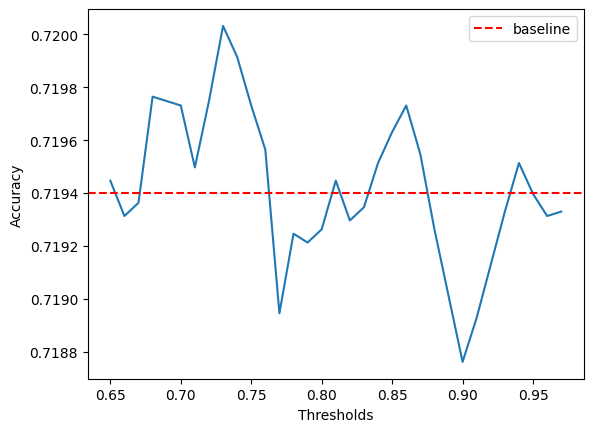

In [ ]:
import matplotlib.pyplot as plt

accs = []
thresholds = np.arange(0.65, 0.98, 0.01)
for threshold in thresholds:
    accs.append(test_classifier_ignoring_neutral(classifier, test_tweets, final_test_labels, threshold))

plt.plot(thresholds, accs)
plt.xlabel("Thresholds")
plt.ylabel("Accuracy")
plt.axhline(y=0.7194, color='r', linestyle='--', label="baseline")
plt.legend()
plt.show()
